<a href="https://colab.research.google.com/github/NilbertoFreitas/Paradigmas01/blob/main/T01_Aprofundamento_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aquisição dos Dados

> Foi utilizado nesta atividade um texto clássico da literatura mundial: **A Divina Comédia**, de Dante Alighieri. Na verdade apenas a primeira parte chamada "Inferno", composta por 33 Cantos e 140 Versos (as outras duas são Purgatório e Paraíso). O texto é em forma de poesia e uma de suas características é que seus versos possuem uma impressionante simetria matemática baseada no número três.

>Desta forma é interessante analisar se um texto escrito com características simétricas se aplicam também à lei de Zipf.

In [14]:
import urllib.request
import pandas as pd
import numpy as np

texto = []

for line in urllib.request.urlopen('https://raw.githubusercontent.com/NilbertoFreitas/Paradigmas01/main/a_divina_comedia_inferno.txt'):
    texto.append(line.decode('utf-8'))

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('0','')
    texto[i] = texto[i].replace('1','')
    texto[i] = texto[i].replace('2','')
    texto[i] = texto[i].replace('3','')
    texto[i] = texto[i].replace('4','')
    texto[i] = texto[i].replace('5','')
    texto[i] = texto[i].replace('6','')
    texto[i] = texto[i].replace('7','')
    texto[i] = texto[i].replace('8','')
    texto[i] = texto[i].replace('9','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace(';','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('[','')
    texto[i] = texto[i].replace(']','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('!','')
    texto[i] = texto[i].replace(':','')
    texto[i] = texto[i].replace('“','')
    texto[i] = texto[i].replace('”','')
    texto[i] = texto[i].replace('*','')
    texto[i] = texto[i].replace('***','')
    texto[i] = texto[i].replace('-','')
    texto[i] = texto[i].replace('—','')
    texto[i] = texto[i].replace('ii','')
    texto[i] = texto[i].replace('iii','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "

# Construção do Dicionário

In [15]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(sorted(mydict))

['a', 'abafava', 'abaixava', 'abaixo', 'abala', 'abalado', 'abalança', 'abalares', 'abalizada', 'abalize', 'abalo', 'abalroa', 'abanando', 'abandonado', 'abandonava', 'abastança', 'abatendo', 'abateram', 'abati', 'abatia', 'abatida', 'abatido', 'abbagliato', 'abel', 'abelhas', 'abençoado', 'aberta', 'abertas', 'aberto', 'abertura', 'abismo', 'abismos', 'abismou', 'abjecta', 'abjeta', 'abjeto', 'aboca', 'abominoso', 'aborrecido', 'aborígenes', 'abraam', 'abrace', 'abrange', 'abrangia', 'abrasa', 'abrasadora', 'abrasara', 'abraça', 'abraçada', 'abraçamlhe', 'abraçandome', 'abraçase', 'abraço', 'abraçálos', 'abre', 'abrese', 'abria', 'abriam', 'abriga', 'abrigado', 'abrigo', 'abrindo', 'abrir', 'abriram', 'abriste', 'abriu', 'abro', 'absalão', 'absolto', 'absolvendo', 'absolvição', 'absorta', 'absorto', 'acabando', 'acabava', 'acaso', 'acatamento', 'acedendo', 'aceitando', 'aceito', 'acelera', 'acelerada', 'aceleradas', 'acelerado', 'acelerar', 'acena', 'acenava', 'acende', 'acendendo', '

In [16]:
df = pd.DataFrame(mydict.items(), columns=['word', 'count']).sort_values('count', ascending=False)

df = df.sort_values('count', ascending=False).reset_index(drop=True)
df.head()

,word,count
0,que,1363
1,o,1151
2,a,1149
3,de,1012
4,e,800


# Exibição dos Resultados

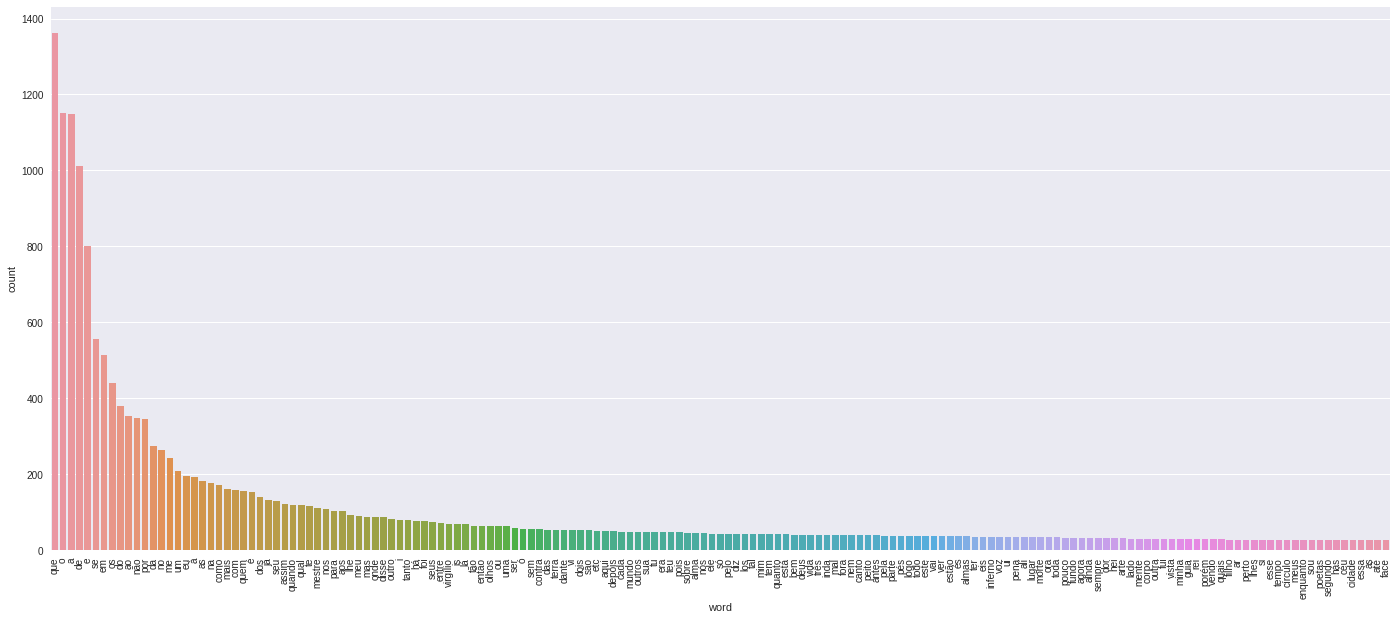

In [28]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 25] # somente termos com mais de 25 ocorrências

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

In [29]:
df['log_count'] = np.log(df['count'])
df['log_rank'] = np.log(df.index)
df['log_rank'].replace(-np.Inf, 0, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,word,count,log_count,log_rank
33,que,1363,7.217443,3.496508
34,o,1151,7.048386,3.526361
0,a,1149,7.046647,0.000000
40,de,1012,6.919684,3.688879
31,e,800,6.684612,3.433987


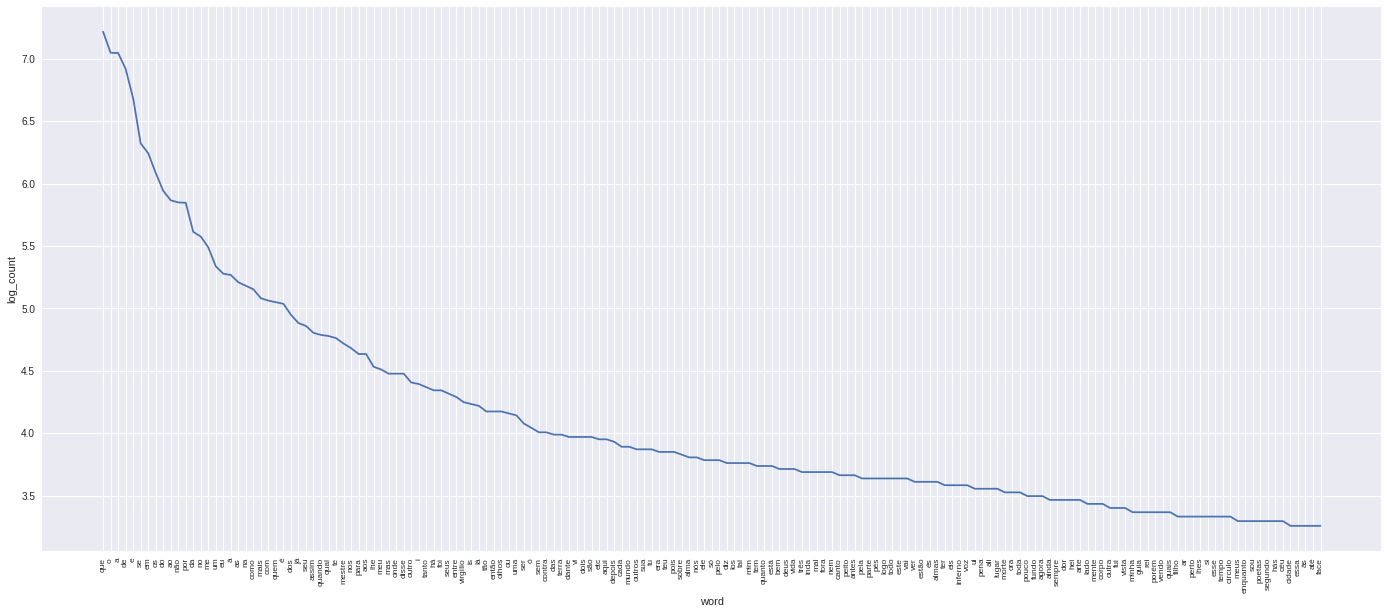

In [30]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(24,10))
sns.lineplot(x=df[df['count']> 20].word, y=df[df['count']>20]['log_count'])
plt.xticks(rotation=90, fontsize='small')
plt.show()

#Conclusão

Foi interessante observar que um texto suficientemente grande, mesmo com características de simetria matemática também atendem ao princípio da lei de Zipf.